<a href="https://colab.research.google.com/github/pachterlab/GRNP_2020/blob/master/notebooks/figure_generation/GenFig2_S4_S5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Generates figure 2 as well as supplementary figures 4 and 5**

This notebook generates figures that show the fraction of single-copy molecules per gene in different datasets.

Steps:
1. Download the code and processed data
2. Setup the R environment
3. Generate the figures

The data for these figures is produced by the following notebooks:

Processing of FASTQ files with kallisto and bustools:

https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessEVAL.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessEVALPBMC.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessEVALPBMC_DS.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessEVALPBMC_SW.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessLC.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessMRET.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessMRET2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessPBMC_NG.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessPBMC_NG_2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessPBMC_V2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessPBMC_V3.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessPBMC_V3_2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessPBMC_V3_3.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessMARSSEQ.ipynb

Preprocessing of BUG files:

https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_EVAL.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_EVALPBMC.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_EVALPBMC_DS.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_EVALPBMC_SW.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_LC.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_MRET.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_MRET2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_PBMC_NG.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_PBMC_NG_2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_PBMC_V2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_PBMC_V3.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_PBMC_V3_2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_PBMC_V3_3.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_MARSSEQ.ipynb



**1. Download the code and processed data**

In [1]:
#download the R code
![ -d "GRNP_2020" ] && rm -r GRNP_2020

!git clone https://github.com/pachterlab/GRNP_2020.git


Cloning into 'GRNP_2020'...
remote: Enumerating objects: 359, done.
remote: Counting objects: 100% (359/359), done.
remote: Compressing objects: 100% (299/299), done.
remote: Total 2077 (delta 264), reused 87 (delta 60), pack-reused 1718
Receiving objects: 100% (2077/2077), 10.92 MiB | 17.55 MiB/s, done.
Resolving deltas: 100% (1449/1449), done.


In [2]:
#download processed data from Zenodo for all datasets
![ -d "figureData" ] && rm -r figureData
!mkdir figureData
!cd figureData && wget https://zenodo.org/record/4661263/files/EVAL.zip?download=1 && unzip 'EVAL.zip?download=1' && rm 'EVAL.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/EVALPBMC.zip?download=1 && unzip 'EVALPBMC.zip?download=1' && rm 'EVALPBMC.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/EVALPBMC_DS.zip?download=1 && unzip 'EVALPBMC_DS.zip?download=1' && rm 'EVALPBMC_DS.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/EVALPBMC_SW.zip?download=1 && unzip 'EVALPBMC_SW.zip?download=1' && rm 'EVALPBMC_SW.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/PBMC_V3_3.zip?download=1 && unzip 'PBMC_V3_3.zip?download=1' && rm 'PBMC_V3_3.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/PBMC_V3_2.zip?download=1 && unzip 'PBMC_V3_2.zip?download=1' && rm 'PBMC_V3_2.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/PBMC_V3.zip?download=1 && unzip 'PBMC_V3.zip?download=1' && rm 'PBMC_V3.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/PBMC_NG.zip?download=1 && unzip 'PBMC_NG.zip?download=1' && rm 'PBMC_NG.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/PBMC_NG_2.zip?download=1 && unzip 'PBMC_NG_2.zip?download=1' && rm 'PBMC_NG_2.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/PBMC_V2.zip?download=1 && unzip 'PBMC_V2.zip?download=1' && rm 'PBMC_V2.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/LC.zip?download=1 && unzip 'LC.zip?download=1' && rm 'LC.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/MRET.zip?download=1 && unzip 'MRET.zip?download=1' && rm 'MRET.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/MRET2.zip?download=1 && unzip 'MRET2.zip?download=1' && rm 'MRET2.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/MARSSEQ.zip?download=1 && unzip 'MARSSEQ.zip?download=1' && rm 'MARSSEQ.zip?download=1'


--2021-04-05 12:15:29--  https://zenodo.org/record/4661263/files/EVAL.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 206479312 (197M) [application/octet-stream]
Saving to: ‘EVAL.zip?download=1’

EVAL.zip?download=1 100%[===================>] 196.91M  8.62MB/s    in 24s     

2021-04-05 12:15:55 (8.16 MB/s) - ‘EVAL.zip?download=1’ saved [206479312/206479312]

Archive:  EVAL.zip?download=1
   creating: EVAL/
  inflating: EVAL/Bug_10.RData       
  inflating: EVAL/Bug_100.RData      
  inflating: EVAL/Bug_20.RData       
  inflating: EVAL/Bug_25.RData       
  inflating: EVAL/Bug_40.RData       
  inflating: EVAL/Bug_5.RData        
  inflating: EVAL/Bug_60.RData       
  inflating: EVAL/Bug_80.RData       
  inflating: EVAL/ds_summary.txt     
  inflating: EVAL/PredEvalData.RDS   
  inflating: EVAL/Stats.RData        
--2021-04-05 12:15:58--  ht

In [3]:
#Check that download worked
!cd figureData && ls -l && cd EVAL && ls -l

total 56
drwxr-xr-x 2 root root 4096 Jul  1  2020 EVAL
drwxr-xr-x 2 root root 4096 Jul  1  2020 EVALPBMC
drwxr-xr-x 2 root root 4096 Jul  1  2020 EVALPBMC_DS
drwxr-xr-x 2 root root 4096 Jul  1  2020 EVALPBMC_SW
drwxr-xr-x 2 root root 4096 Jul  1  2020 LC
drwxr-xr-x 2 root root 4096 Feb  4 19:07 MARSSEQ
drwxr-xr-x 2 root root 4096 Jul  1  2020 MRET
drwxr-xr-x 2 root root 4096 Jul  1  2020 MRET2
drwxr-xr-x 2 root root 4096 Jul  1  2020 PBMC_NG
drwxr-xr-x 2 root root 4096 Jul  1  2020 PBMC_NG_2
drwxr-xr-x 2 root root 4096 Jul  1  2020 PBMC_V2
drwxr-xr-x 2 root root 4096 Jul  1  2020 PBMC_V3
drwxr-xr-x 2 root root 4096 Jul  1  2020 PBMC_V3_2
drwxr-xr-x 2 root root 4096 Jul  1  2020 PBMC_V3_3
total 212788
-rw-r--r-- 1 root root 37523336 Jun 30  2020 Bug_100.RData
-rw-r--r-- 1 root root 17301493 Jun 30  2020 Bug_10.RData
-rw-r--r-- 1 root root 23443334 Jun 30  2020 Bug_20.RData
-rw-r--r-- 1 root root 25288320 Jun 30  2020 Bug_25.RData
-rw-r--r-- 1 root root 29057075 Jun 30  2020 Bug_40.RData

**2. Prepare the R environment**

In [4]:
#switch to R mode
%reload_ext rpy2.ipython


In [5]:
#install the R packages
%%R
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("DescTools")
install.packages("ggpubr")
install.packages("hexbin")
install.packages("reshape2")
install.packages("farver")
install.packages("tidyverse")


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_1.3.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 712837 bytes (696 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

**3. Generate the figures**


In [6]:
#First set some path variables
%%R
source("GRNP_2020/RCode/pathsGoogleColab.R")


In [7]:
#Import the code for prediction (available in other notebooks)
%%R
source(paste0(sourcePath,"ButterflyHelpers.R"))
#source(paste0(sourcePath,"preseqHelpers.R"))
source(paste0(sourcePath,"CCCHelpers.R"))
source(paste0(sourcePath,"ggplotHelpers.R"))
library(tidyverse)
library(ggplot2)
library(ggpubr)




R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

R[write to console]: ✔ tibble  3.1.0     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand()    masks Matrix::expand()
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ tidyr::pack()      masks Matrix::pack()
✖ purrr::set_names() masks magrittr::set_names()
✖ tidyr::unpack()    masks Matrix::unpack()



In [8]:
#create figure directory
![ -d "figures" ] && rm -r figures
!mkdir figures

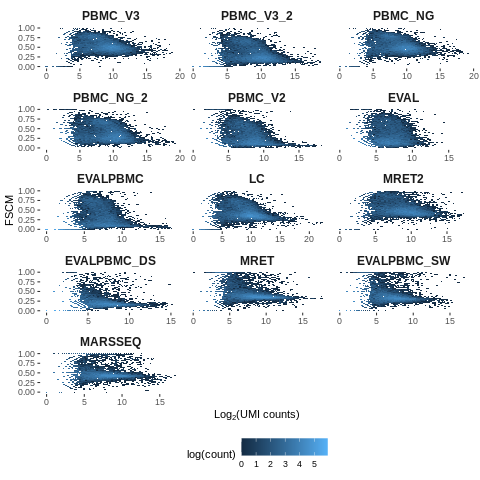

In [9]:
#####################################################
# Fig S4
#####################################################

%%R

loadStats("LC")
loadStats("PBMC_NG")
loadStats("PBMC_NG_2")
loadStats("PBMC_V3")
loadStats("PBMC_V3_2")
loadStats("PBMC_V3_3")
loadStats("PBMC_V2")
loadStats("EVAL")
loadStats("EVALPBMC")
loadStats("EVALPBMC_DS")
loadStats("EVALPBMC_SW")
loadStats("MRET")
loadStats("MRET2")
loadStats("MARSSEQ")


AddToHexbinData = function(dat, umis, fracOnes, dataset) {
  logUmis = log2(umis)
  d = tibble(x = logUmis, y = fracOnes, ds = rep(dataset, length(fracOnes)))

  if (is.null(dat)) {
    dat = d
  } else {
    dat = bind_rows(dat,d);
  }

  return(dat)
}


dat = NULL

dat = AddToHexbinData(dat, statsPBMC_V3$UMIs_PBMC_V3_d_100, statsPBMC_V3$FracOnes_PBMC_V3_d_100, "PBMC_V3")
dat = AddToHexbinData(dat, statsPBMC_V3_2$UMIs_PBMC_V3_2_d_100, statsPBMC_V3_2$FracOnes_PBMC_V3_2_d_100, "PBMC_V3_2")
#dat = AddToHexbinData(dat, statsPBMC_V3_3$UMIs_PBMC_V3_3_d_100, statsPBMC_V3_3$FracOnes_PBMC_V3_3_d_100, "PBMC_V3_3") #this is the same as Fig 2A, don't duplicate it!
dat = AddToHexbinData(dat, statsPBMC_NG$UMIs_PBMC_NG_d_100, statsPBMC_NG$FracOnes_PBMC_NG_d_100, "PBMC_NG")
dat = AddToHexbinData(dat, statsPBMC_NG_2$UMIs_PBMC_NG_2_d_100, statsPBMC_NG_2$FracOnes_PBMC_NG_2_d_100, "PBMC_NG_2")
dat = AddToHexbinData(dat, statsPBMC_V2$UMIs_PBMC_V2_d_100, statsPBMC_V2$FracOnes_PBMC_V2_d_100, "PBMC_V2")
dat = AddToHexbinData(dat, statsEVAL$UMIs_EVAL_d_100, statsEVAL$FracOnes_EVAL_d_100, "EVAL")
dat = AddToHexbinData(dat, statsEVALPBMC$UMIs_EVALPBMC_d_100, statsEVALPBMC$FracOnes_EVALPBMC_d_100, "EVALPBMC")
dat = AddToHexbinData(dat, statsLC$UMIs_LC_d_100, statsLC$FracOnes_LC_d_100, "LC")
dat = AddToHexbinData(dat, statsMRET2$UMIs_MRET2_d_100, statsMRET2$FracOnes_MRET2_d_100, "MRET2")
dat = AddToHexbinData(dat, statsEVALPBMC_DS$UMIs_EVALPBMC_DS_d_100, statsEVALPBMC_DS$FracOnes_EVALPBMC_DS_d_100, "EVALPBMC_DS")
dat = AddToHexbinData(dat, statsMRET$UMIs_MRET_d_100, statsMRET$FracOnes_MRET_d_100, "MRET")
dat = AddToHexbinData(dat, statsEVALPBMC_SW$UMIs_EVALPBMC_SW_d_100, statsEVALPBMC_SW$FracOnes_EVALPBMC_SW_d_100, "EVALPBMC_SW")
dat = AddToHexbinData(dat, statsMARSSEQ$UMIs_MARSSEQ_d_100, statsMARSSEQ$FracOnes_MARSSEQ_d_100, "MARSSEQ")

dat$ds = factor(dat$ds, levels = c("PBMC_V3","PBMC_V3_2","PBMC_V3_3","PBMC_NG","PBMC_NG_2","PBMC_V2","EVAL","EVALPBMC","LC","MRET2","EVALPBMC_DS","MRET","EVALPBMC_SW","MARSSEQ"))

#create figure:
figS4 = ggplot(dat) +
  stat_binhex(bins=60,na.rm = TRUE, mapping=aes(x = x, y=y, fill = log(..count..))) + # opts(aspect.ratio = 1) +
  facet_wrap(facets = ~ds, scales = "free_x", ncol=3) +
  labs(x=expression(Log[2]*"(UMI counts)"), y="FSCM") +
  theme(panel.background = element_rect("white", "white", 0, 0, "white"),
        legend.position= "bottom", legend.direction = "horizontal",#, legend.title = element_blank())
        strip.text.x = element_text(size = 12, face = "bold"),
        #legend.position= "none",
        strip.background = element_blank())

print(figS4) # for some reason this plot sometimes fail and show an error ("hbin" ...) - Restart R and try again in that case

ggsave(
  paste0(figure_path, "FigS4.png"),
  plot = figS4, device = "png",
  width = 7, height = 11, dpi = 300)


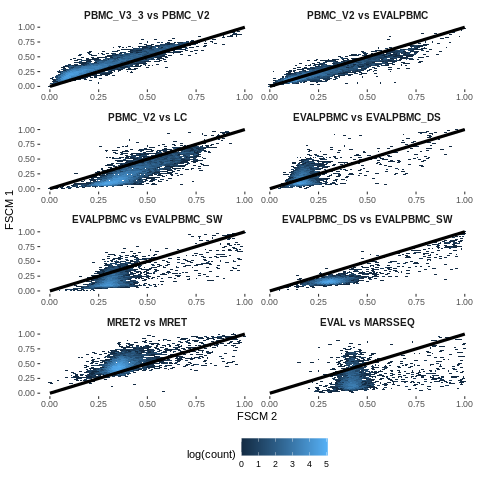

In [10]:
#############################
# Fig S5 - Hexbin plot
#############################
%%R

AddToHexbinData2 = function(dat, ds1, ds2) {
  stats1 = get(paste0("stats",ds1), envir=.GlobalEnv)
  indUMIs1 = which(colnames(stats1) == paste0("UMIs_",ds1,"_d_100"))
  indFO1 = which(colnames(stats1) == paste0("FracOnes_",ds1,"_d_100"))
  stats2 = get(paste0("stats",ds2), envir=.GlobalEnv)
  indUMIs2 = which(colnames(stats2) == paste0("UMIs_",ds2,"_d_100"))
  indFO2 = which(colnames(stats2) == paste0("FracOnes_",ds2,"_d_100"))
  
  stats1Filt = stats1[stats1[[indUMIs1]] >= 200, ]
  stats2Filt = stats2[stats2[[indUMIs2]] >= 200, ]
  
  merged = inner_join(stats2Filt[, c(1,indFO2)], stats1Filt[, c(1,indFO1)], by="gene")
  colnames(merged) = c("gene", "x", "y")
  
  d = merged %>% add_column(ds=paste0(ds1, " vs ", ds2))
  

  if (is.null(dat)) {
    dat = d
  } else {
    dat = bind_rows(dat,d);
  }
  
  return(dat)
}

#ds1 = "PBMC_V3_3"
#ds2 = "PBMC_V3_2"

dat2 = NULL

#dat2 = AddToHexbinData2(dat2, "PBMC_V3_3", "PBMC_V3_2") #the same as Fig 2B, don't duplicate it!
dat2 = AddToHexbinData2(dat2, "PBMC_V3_3", "PBMC_V2")
dat2 = AddToHexbinData2(dat2, "PBMC_V2", "EVALPBMC")
dat2 = AddToHexbinData2(dat2, "PBMC_V2", "LC")
dat2 = AddToHexbinData2(dat2, "EVALPBMC", "EVALPBMC_DS")
dat2 = AddToHexbinData2(dat2, "EVALPBMC", "EVALPBMC_SW")
dat2 = AddToHexbinData2(dat2, "EVALPBMC_DS", "EVALPBMC_SW")
dat2 = AddToHexbinData2(dat2, "MRET2", "MRET")
dat2 = AddToHexbinData2(dat2, "EVAL", "MARSSEQ")

#dat2 = AddToHexbinData2(dat2, "PBMC_V3_3", "PBMC_V2")

#specify the order of the plots
dat2$ds = factor(dat2$ds, levels = c("PBMC_V3_3 vs PBMC_V3_2", "PBMC_V3_3 vs PBMC_V2", "PBMC_V2 vs EVALPBMC",
                                     "PBMC_V2 vs LC", "EVALPBMC vs EVALPBMC_DS", "EVALPBMC vs EVALPBMC_SW", 
                                     "EVALPBMC_DS vs EVALPBMC_SW", "MRET2 vs MRET", "EVAL vs MARSSEQ"))

dfline = data.frame(x=c(0,1), y=c(0,1))

figS5 = ggplot(dat2) +
  stat_binhex(bins=60,na.rm = TRUE, mapping=aes(x = x, y=y, fill = log(..count..))) + # opts(aspect.ratio = 1) +
  geom_line(data=dfline, mapping=aes(x = x, y=y), color="black", size=1.5) + 
  facet_wrap(facets = ~ds, scales = "free_x", ncol=2) +
  labs(x="FSCM 2", y="FSCM 1") +
  theme(panel.background = element_rect("white", "white", 0, 0, "white"),
        legend.position= "bottom", legend.direction = "horizontal",#, legend.title = element_blank())
        strip.text.x = element_text(size = 10, face = "bold"),
        #legend.position= "none",
        strip.background = element_blank())

print(figS5) # for some reason this plot sometimes fail and show an error ("hbin" ...) - Restart R and try again in that case

ggsave(
  paste0(figure_path, "FigS5.png"),
  plot = figS5, device = "png",
  width = 6, height = 10, dpi = 300)


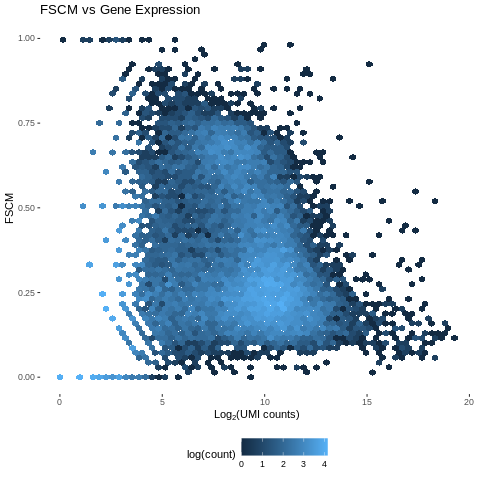

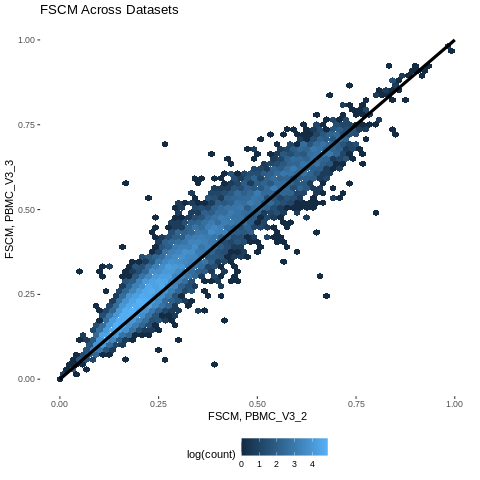

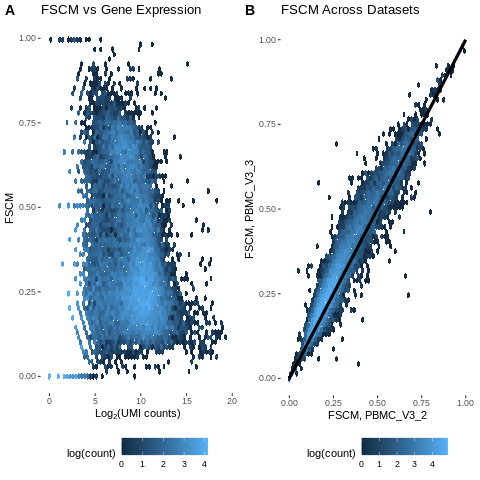

In [11]:
#############################
# Fig 2 - One of each type above
#############################
%%R
dat3 = NULL
dat3 = AddToHexbinData(dat3, statsPBMC_V3_3$UMIs_PBMC_V3_3_d_100, statsPBMC_V3_3$FracOnes_PBMC_V3_3_d_100, "PBMC_V3_3")

fig2A = ggplot(dat3) +
  stat_binhex(bins=60,na.rm = TRUE, mapping=aes(x = x, y=y, fill = log(..count..))) + # opts(aspect.ratio = 1) +
  #facet_wrap(facets = ~ds, scales = "free_x", ncol=3) +
  ggtitle("FSCM vs Gene Expression") + 
  labs(x=expression(Log[2]*"(UMI counts)"), y="FSCM") +
  theme(panel.background = element_rect("white", "white", 0, 0, "white"),
        legend.position= "bottom", legend.direction = "horizontal",#, legend.title = element_blank())
        strip.text.x = element_text(size = 12, face = "bold"),
        #legend.position= "none",
        strip.background = element_blank())

print(fig2A)

dat4 = NULL
dat4 = AddToHexbinData2(dat4, "PBMC_V3_3", "PBMC_V3_2")
dfline = data.frame(x=c(0,1), y=c(0,1))

fig2B = ggplot(dat4) +
  stat_binhex(bins=60,na.rm = TRUE, mapping=aes(x = x, y=y, fill = log(..count..))) + # opts(aspect.ratio = 1) +
  geom_line(data=dfline, mapping=aes(x = x, y=y), color="black", size=1.5) + 
  ggtitle("FSCM Across Datasets") + 
  #facet_wrap(facets = ~ds, scales = "free_x", ncol=2) +
  labs(x="FSCM, PBMC_V3_2", y="FSCM, PBMC_V3_3") +
  theme(panel.background = element_rect("white", "white", 0, 0, "white"),
        legend.position= "bottom", legend.direction = "horizontal",#, legend.title = element_blank())
        strip.text.x = element_text(size = 10, face = "bold"),
        #legend.position= "none",
        strip.background = element_blank())

print(fig2B) # for some reason this plot sometimes fail and show an error ("hbin" ...) - Restart R and try again in that case

fig2 = ggarrange(fig2A, fig2B, nrow=1, ncol=2,labels=c("A","B"))

print(fig2) # for some reason this plot sometimes fail and show an error ("hbin" ...) - Restart R and try again in that case

ggsave(
  paste0(figure_path, "Fig2.png"),
  plot = fig2, device = "png",
  width = 6, height = 4, dpi = 300)

